<a href="https://colab.research.google.com/github/babupallam/PyTorch-Learning-Repository/blob/main/05_Convolutional_Neural_Networks_(CNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **5.1. Introduction to CNNs**
- CNNs are designed to process structured grid data, such as images, where the spatial relationships between pixels matter.
- They use **convolutional layers**, which apply filters (or kernels) that slide over the input image to detect patterns like edges, textures, or more complex features in deeper layers.
- CNNs typically consist of three key types of layers:
  1. **Convolutional Layers**: Detect spatial hierarchies in the input.
  2. **Pooling Layers**: Reduce the dimensionality of the data while preserving important features.
  3. **Fully Connected Layers**: Perform the final classification or regression task.

---



#### **5.2. CNN Architecture Components**
- **Convolutional Layer (`nn.Conv2d`)**: The core layer in a CNN that applies a set of filters to the input.
  - Each filter (kernel) is a small matrix that slides over the input image, detecting patterns such as edges or textures.
  - The output of a convolutional layer is a set of **feature maps** that highlight different patterns detected by the filters.
  
- **Activation Function (`torch.relu`)**: Non-linearity is introduced after the convolutional layer, typically using ReLU (Rectified Linear Unit).
  
- **Pooling Layer (`nn.MaxPool2d`)**: Pooling layers downsample the input by reducing its size while retaining the most important features.
  - **Max pooling** is commonly used, where the maximum value is taken from each region of the input.
  
- **Fully Connected Layer (`nn.Linear`)**: After several convolutional and pooling layers, the feature maps are flattened and passed through fully connected layers for classification or regression.

---

**5.2.1. Understanding the Role of Filters (Kernels)**:
- Each filter in a convolutional layer detects specific features like edges, corners, or textures.
- As we go deeper in the network, the filters detect more complex patterns like shapes, objects, or regions of interest in the image.

---



#### **5.3. Building a Convolutional Neural Network**
We will now build a simple CNN architecture for image classification on the CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 classes.

---

**5.3.1. CIFAR-10 Dataset**
- CIFAR-10 is a popular dataset for image classification, with 50,000 training images and 10,000 test images. It contains 10 different categories (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck).

**Demonstration: CNN Architecture for CIFAR-10 Classification**

In [1]:
import torch
import torch.nn as nn  # Import the neural network module from PyTorch for building layers
import torch.optim as optim  # Import optimization algorithms like Adam, SGD, etc.
import torchvision  # Provides datasets and model architectures for computer vision tasks
import torchvision.transforms as transforms  # Tools for transforming and preprocessing data

# Define transformations: Convert images to PyTorch tensors and normalize them to a range [-1, 1]
# Normalization is done using the mean and standard deviation for each RGB channel
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor format (HWC to CHW and range [0, 1])
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] for each channel
])

# Step 1: Load CIFAR-10 dataset
# CIFAR-10 is a dataset of 60,000 32x32 color images across 10 classes
# 'train=True' means we are loading the training set
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# 'train=False' means we are loading the test set
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Step 2: Load the dataset using DataLoader for batching and shuffling
# DataLoader batches the data and allows iteration over it efficiently
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
# For test data, shuffling is not necessary, so shuffle=False
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Step 3: Define a simple CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # First convolutional layer: Input is 3 channels (RGB), output is 16 channels (feature maps)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)

        # Second convolutional layer: Input is 16 channels, output is 32 channels (feature maps)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        # Max-pooling layer: Reduces the spatial dimension of the feature maps by half (2x2 pooling)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layer 1: Input size is 32 channels * 8x8 image after pooling, output is 128 neurons
        self.fc1 = nn.Linear(32 * 8 * 8, 128)

        # Fully connected layer 2: Final layer with 128 input neurons and 10 output neurons (for 10 classes)
        self.fc2 = nn.Linear(128, 10)

    # Define the forward pass of the model
    def forward(self, x):
        # First convolutional layer followed by ReLU activation and max pooling
        x = self.pool(torch.relu(self.conv1(x)))  # Output: [batch_size, 16, 16, 16] (after pooling)

        # Second convolutional layer followed by ReLU activation and max pooling
        x = self.pool(torch.relu(self.conv2(x)))  # Output: [batch_size, 32, 8, 8] (after pooling)

        # Flatten the output from the convolutional layers into a vector for the fully connected layer
        x = x.view(-1, 32 * 8 * 8)  # Flatten the tensor to [batch_size, 32 * 8 * 8]

        # First fully connected layer with ReLU activation
        x = torch.relu(self.fc1(x))  # Output: [batch_size, 128]

        # Output layer (no activation, as we will use CrossEntropyLoss which applies softmax internally)
        x = self.fc2(x)  # Output: [batch_size, 10] (logits for 10 classes)

        return x

# Step 4: Initialize the model
model = SimpleCNN()  # Create an instance of the CNN model

# Step 5: Define the loss function and optimizer
# CrossEntropyLoss is used for classification tasks (combines softmax and NLLLoss)
criterion = nn.CrossEntropyLoss()

# Adam optimizer is used with a learning rate of 0.001 to update the model's weights
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop (simplified for demonstration)
epochs = 10  # Train the model for 10 epochs
for epoch in range(epochs):  # Loop over the entire dataset multiple times
    running_loss = 0.0  # Initialize running loss for each epoch

    # Loop over mini-batches of data in the training set
    for inputs, labels in train_loader:

        # Zero the parameter gradients (reset gradients before backpropagation)
        optimizer.zero_grad()

        # Forward pass: Compute the output of the model for the inputs
        outputs = model(inputs)

        # Calculate the loss between the model's predictions (outputs) and the actual labels
        loss = criterion(outputs, labels)

        # Backward pass: Compute the gradients for each parameter (backpropagation)
        loss.backward()

        # Update the model's weights using the optimizer
        optimizer.step()

        # Accumulate the loss for reporting
        running_loss += loss.item()

    # Print the average loss for this epoch
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Print when the training is complete
print("Training Complete.")


100%|██████████| 170498071/170498071 [00:02<00:00, 80225313.31it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/10], Loss: 1.4399
Epoch [2/10], Loss: 1.1123
Epoch [3/10], Loss: 0.9560
Epoch [4/10], Loss: 0.8511
Epoch [5/10], Loss: 0.7738
Epoch [6/10], Loss: 0.6955
Epoch [7/10], Loss: 0.6303
Epoch [8/10], Loss: 0.5740
Epoch [9/10], Loss: 0.5165
Epoch [10/10], Loss: 0.4564
Training Complete.



**Explanation**:
- **Model Architecture**:
  - **Convolutional Layers**:
    - `nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)` applies 16 filters (3x3 kernels) on the input image (with 3 channels for RGB).
    - The second convolution applies 32 filters, detecting more complex patterns.
  - **Pooling Layer**: `nn.MaxPool2d(kernel_size=2)` reduces the size of the feature maps by half (downsampling), retaining the most important features.
  - **Fully Connected Layers**: After flattening the feature maps, the model passes the data through two fully connected layers, with ReLU activation applied to the first.
  
- **Training Loop**:
  - The model is trained for 10 epochs, and the optimizer updates the weights after each batch.
  - The **CrossEntropyLoss** function is used for multi-class classification, computing the difference between the predicted probabilities and the true labels.

---



#### **5.4. Observations on CNN Behavior**
- **Convolutional Layers**: Learn hierarchical features from the data. In the earlier layers, the model learns simple patterns like edges, while in deeper layers, it learns more complex structures like shapes or objects.
- **Pooling**: Helps reduce the spatial dimensions of the data, making the model computationally efficient while retaining important features.
- **Fully Connected Layers**: After the convolutional layers have extracted relevant features, fully connected layers map these features to the final output classes.

---



#### **5.5. Visualizing CNN Filters and Feature Maps**
- One of the key advantages of CNNs is their ability to learn filters that capture important patterns in the data. We can visualize the filters learned by the convolutional layers and the feature maps produced by applying these filters.

---

**5.5.1. Visualizing Filters**
- The weights of the filters in a convolutional layer represent the patterns the model is learning. We can visualize the learned filters to get insights into what features the model is focusing on.

**Demonstration: Visualizing Filters**

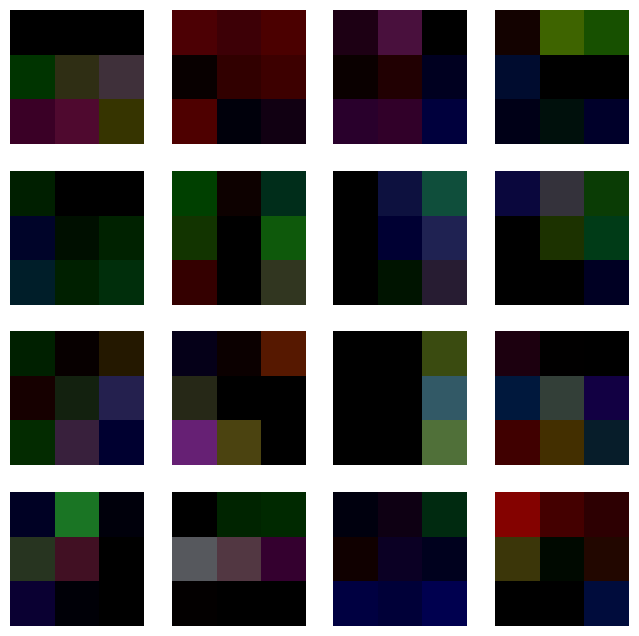

In [2]:
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Step 1: Extract the learned filters (weights) from the first convolutional layer
# Access the weight tensor of the first convolutional layer (conv1) and clone it to avoid modifying the original data
filters = model.conv1.weight.data.clone()  # 'model.conv1.weight.data' contains the filters/weights learned by the layer

# Step 2: Visualize the filters
# Create a figure with subplots to display 16 filters from the first convolutional layer (4x4 grid)
fig, axs = plt.subplots(4, 4, figsize=(8, 8))  # '4x4' grid of subplots, each for visualizing one filter

# Loop through the first 16 filters in the conv1 layer
for i in range(16):
    # Convert the i-th filter from the format [channels, height, width] to [height, width, channels]
    # This is necessary for displaying the filter as an image
    filter_img = filters[i].permute(1, 2, 0).numpy()  # 'permute(1, 2, 0)' changes the order of dimensions from [C, H, W] to [H, W, C]

    # Display the filter on the i-th subplot (in a 4x4 grid)
    axs[i//4, i%4].imshow(filter_img)  # i//4 gives the row, i%4 gives the column in the 4x4 grid
    axs[i//4, i%4].axis('off')  # Remove axis ticks for better visualization

# Step 3: Show the plot
plt.show()  # Display the filters in the figure



**Explanation**:
- The learned filters from the first convolutional layer are visualized. These filters represent the patterns (e.g., edges, gradients) that the model has learned to detect in the input images.

---

**5.5.2. Visualizing Feature Maps**
- The feature maps are the result of applying filters to the input image. By visualizing these feature maps, we can understand how the model is processing the input at each convolutional layer.

**Demonstration: Visualizing Feature Maps**

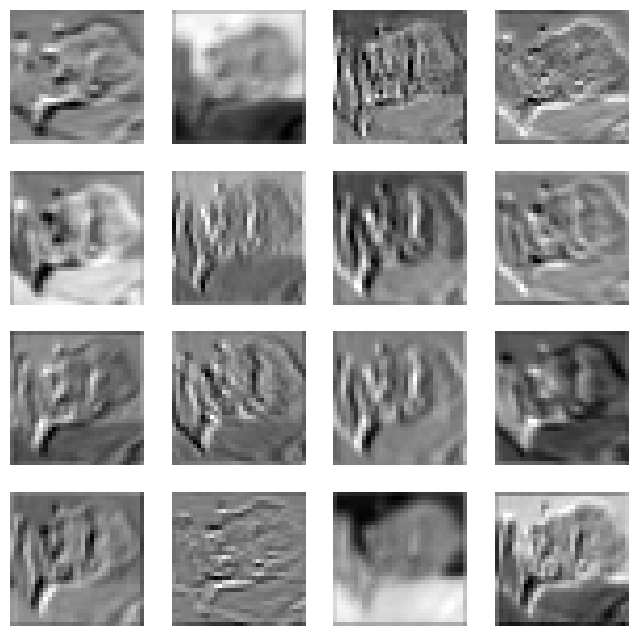

In [3]:
# Function to visualize feature maps from the first convolutional layer
def visualize_feature_maps(model, input_image):
    """
    Visualizes the feature maps produced by the first convolutional layer of the model
    for a given input image.

    Parameters:
    model - The CNN model
    input_image - A single image from the dataset (tensor) to pass through the model
    """
    with torch.no_grad():  # Disable gradient calculations (not needed for visualization)
        # Forward pass through the first convolutional layer (conv1)
        # input_image.unsqueeze(0) adds a batch dimension to the input (needed for model inference)
        feature_maps = model.conv1(input_image.unsqueeze(0))

    # Step 1: Create a 4x4 grid of subplots to visualize 16 feature maps
    fig, axs = plt.subplots(4, 4, figsize=(8, 8))  # 16 feature maps will be visualized in a 4x4 grid

    # Step 2: Loop through the first 16 feature maps (since conv1 has 16 output channels)
    for i in range(16):
        # Extract the i-th feature map for the given input image
        feature_map_img = feature_maps[0, i].cpu().numpy()  # Convert feature map tensor to NumPy array for visualization

        # Display the feature map on the corresponding subplot
        axs[i // 4, i % 4].imshow(feature_map_img, cmap='gray')  # Show the feature map in grayscale
        axs[i // 4, i % 4].axis('off')  # Hide axis labels for cleaner visualization

    # Step 3: Show the figure with all the feature maps
    plt.show()

# Step 4: Visualize feature maps for the first image in the dataset
# Get a batch of test images from the test_loader
example_image, _ = next(iter(test_loader))  # Get one batch of images and labels (ignore labels with _)

# Call the function to visualize feature maps of the first image in the batch
visualize_feature_maps(model, example_image[0])  # Visualize feature maps for the first image in the batch



**Explanation**:
- This function visualizes the feature maps generated by the first convolutional layer for a given input image. These maps show how different filters are activated by different parts of the input.

---



#### **5.6. Advanced Techniques in CNNs**
- **Batch Normalization**: Normalizes the input to each layer to stabilize and accelerate training. It helps prevent overfitting and allows for the use of higher learning rates.
  
  ```python
  self.bn1 = nn.BatchNorm2d(16)  # Batch normalization after the first convolution
  ```

- **Dropout**: A regularization technique that randomly drops out a percentage of neurons during training to prevent overfitting.
  
  ```python
  self.dropout = nn.Dropout(p=0.5)  # Dropout with a probability of 50%
  ```

---



#### **5.7. State-of-the-Art Observations on CNNs**
- **ResNet (Residual Networks)**: One of the most influential architectures in CNNs. It introduced **residual connections** (skip connections) that allow gradients to flow through deep networks, addressing the **vanishing gradient problem**.
- **EfficientNet**: Recent research has focused on designing CNN architectures that are both efficient and powerful. **EfficientNet** uses a compound scaling method to scale the width, depth, and resolution of the network uniformly.
- **Attention Mechanisms**: CNNs are increasingly being combined with **attention mechanisms** to improve performance on tasks requiring context, such as **image captioning** or **visual question answering (VQA)**.

---



### Continuity to the Next Section
- In the next section, we will explore **Transfer Learning**, a powerful technique that allows us to leverage pre-trained CNNs on large datasets like ImageNet and fine-tune them for our specific tasks.
  
This section covered the architecture of CNNs, training on the CIFAR-10 dataset, visualizing learned filters and feature maps, and advanced techniques like batch normalization and dropout. We will now move to transfer learning to build on the knowledge gained in this section.